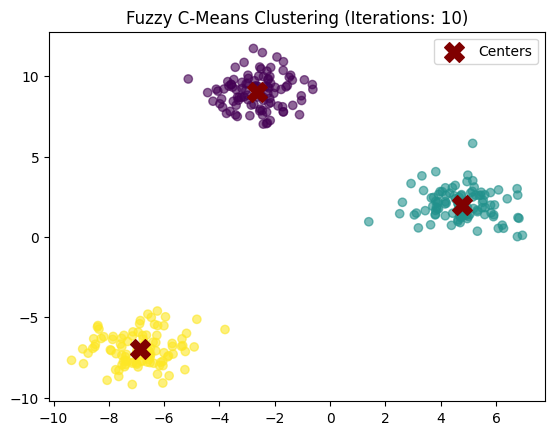

In [16]:
# ques 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Initialize membership matrix
def init_member_mat(N, c):
    U = np.random.rand(N, c)
    U = U / np.sum(U, axis=1, keepdims=True)
    return U

# Update cluster centers
def cluster_center(X, U, m):
    um = U ** m
    V = (um.T @ X) / np.sum(um.T, axis=1, keepdims=True)
    return V

# Fully vectorized update of membership matrix
def update_member_mat(X, V, m):
    N = X.shape[0]
    c = V.shape[0]

    # Compute distance matrix (N, c): each data point to each cluster center
    dist = np.linalg.norm(X[:, np.newaxis, :] - V[np.newaxis, :, :], axis=2) + 1e-10

    # Avoid division by zero by adding small epsilon

    # Calculate new membership matrix using broadcasting
    exponent = 2 / (m - 1)
    denom = (dist[:, :, np.newaxis] / dist[:, np.newaxis, :]) ** exponent
    denom = np.sum(denom, axis=2)
    U_new = 1 / denom

    return U_new

# Full Fuzzy C-Means algorithm
def fcm(X, c, m=2.0, max_iter=100, tol=1e-5):
    N = X.shape[0]
    U = init_member_mat(N, c)

    for it in range(max_iter):
        U_old = U.copy()
        V = cluster_center(X, U, m)
        U = update_member_mat(X, V, m)
        if np.max(np.abs(U - U_old)) < tol:
            break

    return U, V, it + 1

# Generate test data
X, y_true = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply fuzzy c-means
U, V, n_iter = fcm(X, c=3)

# Assign label based on highest membership
labels = np.argmax(U, axis=1)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(V[:, 0], V[:, 1], color='maroon', marker='X', s=200, label='Centers')
plt.title(f"Fuzzy C-Means Clustering (Iterations: {n_iter})")
plt.legend()
plt.show()


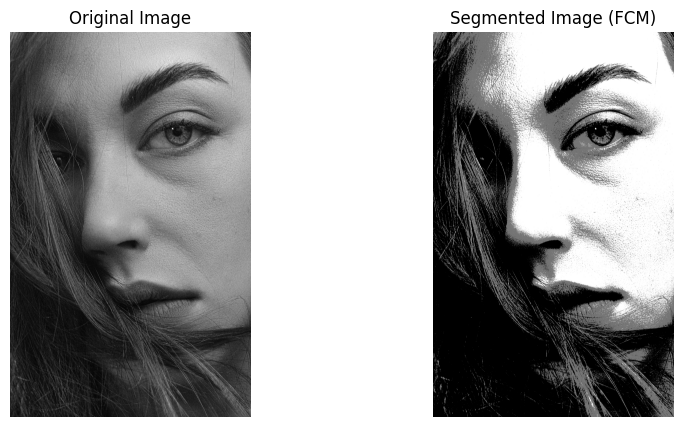

Runtime: 370.0400 seconds
Mean Squared Error: 90.03


In [6]:
# ques 2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time

# --- Fuzzy C-Means Functions (from previous code) ---

def init_member_mat(N, c):
    U = np.random.rand(N, c)
    U = U / np.sum(U, axis=1, keepdims=True)
    return U

def cluster_center(X, U, m):
    um = U ** m
    V = (um.T @ X) / np.sum(um.T, axis=1, keepdims=True)
    return V

def update_member_mat(X, V, m):
    N = X.shape[0]
    c = V.shape[0]

    dist = np.linalg.norm(X[:, np.newaxis] - V[np.newaxis, :], axis=2) + 1e-10
    exponent = 2 / (m - 1)
    denom = (dist[:, :, np.newaxis] / dist[:, np.newaxis, :]) ** exponent
    denom = np.sum(denom, axis=2)
    U_new = 1 / denom
    return U_new

def fuzzy_c_means(X, c, m=2.0, max_iter=100, tol=1e-5):
    N = X.shape[0]
    U = init_member_mat(N, c)
    for it in range(max_iter):
        U_old = U.copy()
        V = cluster_center(X, U, m)
        U = update_member_mat(X, V, m)
        if np.max(np.abs(U - U_old)) < tol:
            break
    return U, V.flatten(), it + 1

# --- Image Segmentation Task ---

# 1. Load grayscale image
image = Image.open('/content/alexander-krivitskiy-xcS5jNNZGsY-unsplash.jpg').convert('L')  # ensure grayscale
image_np = np.array(image)
original_shape = image_np.shape

# Flatten the image to 1-D array
X_flat = image_np.flatten().astype(float).reshape(-1, 1)

# 2. Apply FCM with 3 clusters
start_time = time.time()
U, V, n_iter = fuzzy_c_means(X_flat, c=3)
runtime = time.time() - start_time

# 3. Assign each pixel to the cluster with highest membership
labels = np.argmax(U, axis=1)
segmented_flat = V[labels]
segmented_image = segmented_flat.reshape(original_shape).astype(np.uint8)

# 4. Display original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Image (FCM)")
plt.axis('off')

plt.show()

# 5. Compute mean squared difference
mse = np.mean((image_np - segmented_image) ** 2)
print(f"Runtime: {runtime:.4f} seconds")
print(f"Mean Squared Error: {mse:.2f}")


m = 1.5: Objective = 565.97, Iterations = 7
m = 2.0: Objective = 540.76, Iterations = 12
m = 2.5: Objective = 461.80, Iterations = 14
m = 3.0: Objective = 353.62, Iterations = 16


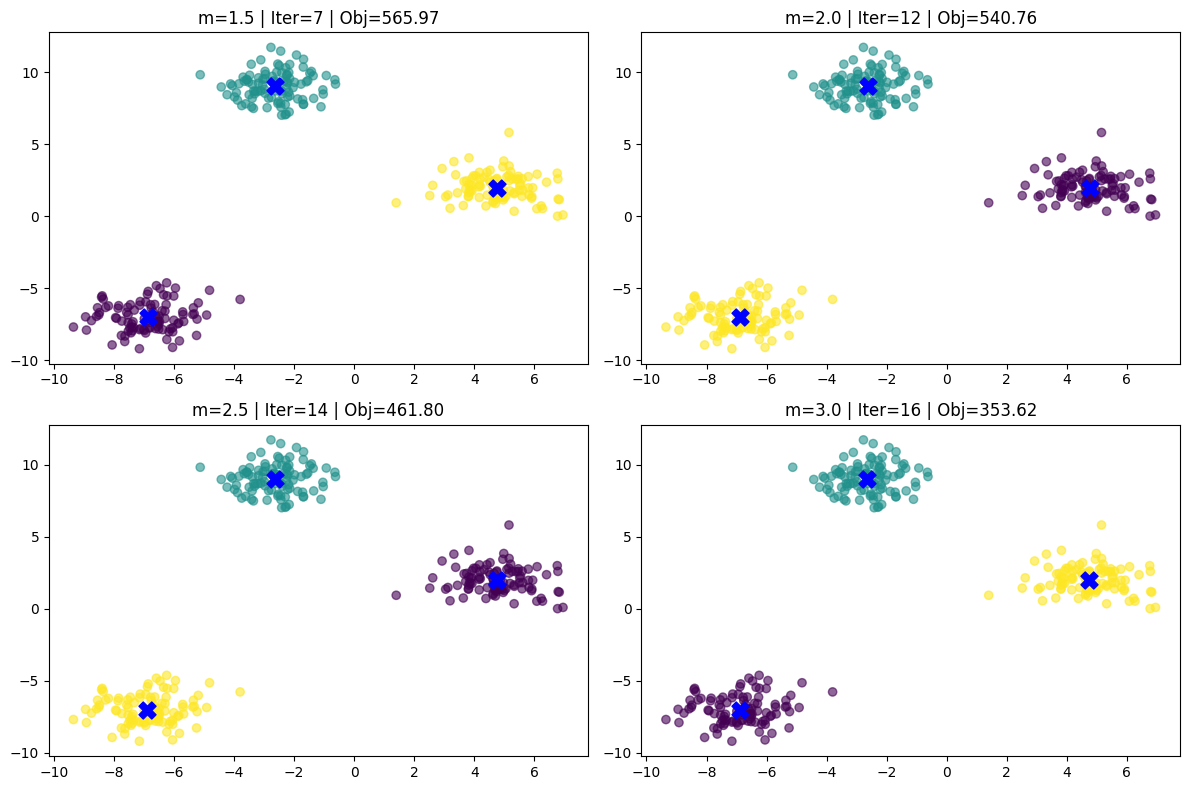

In [4]:
# ques 3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 1. Initialize membership matrix
def init_member_mat(N, c):
    U = np.random.rand(N, c)
    U = U / np.sum(U, axis=1, keepdims=True)
    return U

# 2. Compute cluster centers
def cluster_center(X, U, m):
    um = U ** m
    V = (um.T @ X) / np.sum(um.T, axis=1, keepdims=True)
    return V

# 3. Update membership matrix
def update_member_mat(X, V, m):
    N = X.shape[0]
    c = V.shape[0]
    U_new = np.zeros((N, c))
    for i in range(N):
        for j in range(c):
            dist_ij = np.linalg.norm(X[i] - V[j]) + 1e-10
            sum_term = 0
            for k in range(c):
                dist_ik = np.linalg.norm(X[i] - V[k]) + 1e-10
                sum_term += (dist_ij / dist_ik) ** (2 / (m - 1))
            U_new[i, j] = 1 / sum_term
    return U_new

# 4. Compute objective function
def objective_function(X, U, V, m):
    um = U ** m
    distances = np.linalg.norm(X[:, np.newaxis, :] - V, axis=2) ** 2
    obj = np.sum(um * distances)
    return obj

# 5. Main FCM function
def fcm(X, c, m=2.0, max_iter=100, tol=1e-5):
    U = init_member_mat(X.shape[0], c)
    for it in range(max_iter):
        U_old = U.copy()
        V = cluster_center(X, U, m)
        U = update_member_mat(X, V, m)
        if np.max(np.abs(U - U_old)) < tol:
            break
    obj = objective_function(X, U, V, m)
    return U, V, it + 1, obj

# Generate dataset
X, y_true = make_blobs(n_samples=300, centers=3, random_state=42)

# Try for different m values
m_values = [1.5, 2.0, 2.5, 3.0]

plt.figure(figsize=(12, 8))

for i, m in enumerate(m_values):
    U, V, n_iter, obj = fcm(X, c=3, m=m)
    labels = np.argmax(U, axis=1)

    plt.subplot(2, 2, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(V[:, 0], V[:, 1], color='blue', marker='X', s=150)
    plt.title(f"m={m} | Iter={n_iter} | Obj={obj:.2f}")

    print(f"m = {m}: Objective = {obj:.2f}, Iterations = {n_iter}")

plt.tight_layout()
plt.show()


k=2: PC=0.8922, PE=0.1957
k=3: PC=0.7834, PE=0.3955
k=4: PC=0.7068, PE=0.5611
k=5: PC=0.6658, PE=0.6751
k=6: PC=0.6068, PE=0.8169
Best k according to Partition Coefficient (PC): 2
Best k according to Partition Entropy (PE): 2


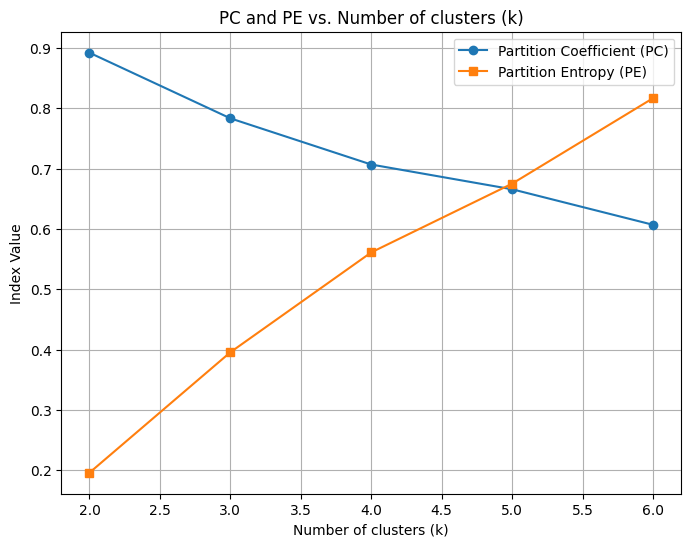

In [4]:
# ques 4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# FCM functions (same as earlier)
def init_member_mat(N, c):
    U = np.random.rand(N, c)
    U = U / np.sum(U, axis=1, keepdims=True)
    return U

def cluster_center(X, U, m):
    um = U ** m
    V = (um.T @ X) / np.sum(um.T, axis=1, keepdims=True)
    return V

def update_member_mat(X, V, m):
    N = X.shape[0]
    c = V.shape[0]
    U_new = np.zeros((N, c))
    for i in range(N):
        for j in range(c):
            dist_ij = np.linalg.norm(X[i] - V[j]) + 1e-10
            sum_term = 0
            for k in range(c):
                dist_ik = np.linalg.norm(X[i] - V[k]) + 1e-10
                sum_term += (dist_ij / dist_ik) ** (2 / (m - 1))
            U_new[i, j] = 1 / sum_term
    return U_new

def fcm(X, c, m=2.0, max_iter=100, tol=1e-5):
    U = init_member_mat(X.shape[0], c)
    for it in range(max_iter):
        U_old = U.copy()
        V = cluster_center(X, U, m)
        U = update_member_mat(X, V, m)
        if np.max(np.abs(U - U_old)) < tol:
            break
    return U, V, it+1

# Partition Coefficient
def partition_coefficient(U):
    return np.sum(U**2) / U.shape[0]

# Partition Entropy
def partition_entropy(U):
    return -np.sum(U * np.log(U + 1e-10)) / U.shape[0]

# Load Iris dataset
iris = load_iris()
X = iris.data  # 4D features

# Try for k = 2 to 6
k_values = range(2, 7)
PC_values = []
PE_values = []

for k in k_values:
    U, V, n_iter = fcm(X, c=k)
    pc = partition_coefficient(U)
    pe = partition_entropy(U)
    PC_values.append(pc)
    PE_values.append(pe)
    print(f"k={k}: PC={pc:.4f}, PE={pe:.4f}")


# After calculating pc_values and pe_values

best_k_pc = k_values[np.argmax(PC_values)]
best_k_pe = k_values[np.argmin(PE_values)]

print(f"Best k according to Partition Coefficient (PC): {best_k_pc}")
print(f"Best k according to Partition Entropy (PE): {best_k_pe}")

# Plot
plt.figure(figsize=(8,6))
plt.plot(k_values, PC_values, marker='o', label="Partition Coefficient (PC)")
plt.plot(k_values, PE_values, marker='s', label="Partition Entropy (PE)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Index Value")
plt.title("PC and PE vs. Number of clusters (k)")
plt.legend()
plt.grid()
plt.show()


Adjusted Rand Index (ARI): 0.0290
Iterations: 12
Runtime: 3.03 seconds


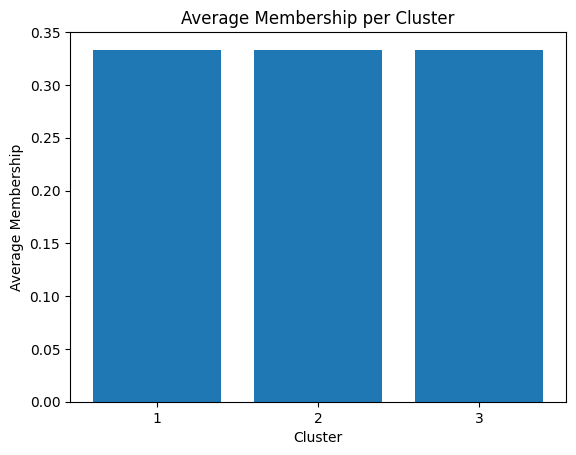

In [3]:
# ques 5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import adjusted_rand_score
import time

# Step 1: Load data
categories = ['rec.autos', 'sci.space', 'talk.politics.misc']
data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
X_text = data.data
y_true = data.target

# Step 2: TF-IDF + dimensionality reduction
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X_text)

svd = TruncatedSVD(n_components=50, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

# ---------- FCM Functions ----------
def init_member_mat(N, c):
    U = np.random.rand(N, c)
    U = U / np.sum(U, axis=1, keepdims=True)
    return U

def cluster_center(X, U, m):
    um = U ** m
    V = (um.T @ X) / np.sum(um.T, axis=1, keepdims=True)
    return V

def update_member_mat(X, V, m):
    N = X.shape[0]
    c = V.shape[0]
    U_new = np.zeros((N, c))
    for i in range(N):
        for j in range(c):
            dist_ij = np.linalg.norm(X[i] - V[j]) + 1e-10
            sum_term = 0
            for k in range(c):
                dist_ik = np.linalg.norm(X[i] - V[k]) + 1e-10
                sum_term += (dist_ij / dist_ik) ** (2 / (m - 1))
            U_new[i, j] = 1 / sum_term
    return U_new

def fcm(X, c, m=2.0, max_iter=100, tol=1e-5):
    U = init_member_mat(X.shape[0], c)
    for it in range(max_iter):
        U_old = U.copy()
        V = cluster_center(X, U, m)
        U = update_member_mat(X, V, m)
        if np.max(np.abs(U - U_old)) < tol:
            break
    return U, V, it+1

# ---------- Run FCM ----------
start_time = time.time()
U, V, n_iter = fcm(X_reduced, c=3)
end_time = time.time()

y_pred = np.argmax(U, axis=1)
ari = adjusted_rand_score(y_true, y_pred)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Iterations: {n_iter}")
print(f"Runtime: {end_time - start_time:.2f} seconds")

# Bar chart of average membership
avg_membership = np.mean(U, axis=0)
plt.bar(range(1, 4), avg_membership)
plt.xticks(range(1, 4))
plt.xlabel("Cluster")
plt.ylabel("Average Membership")
plt.title("Average Membership per Cluster")
plt.show()
